In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.cluster import KMeans
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("sales_data_sample.csv", encoding="latin")

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
df = df[['ORDERLINENUMBER', 'SALES']]

In [6]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df.values)

In [7]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit_predict(scaled_values)
    wcss.append(model.inertia_)

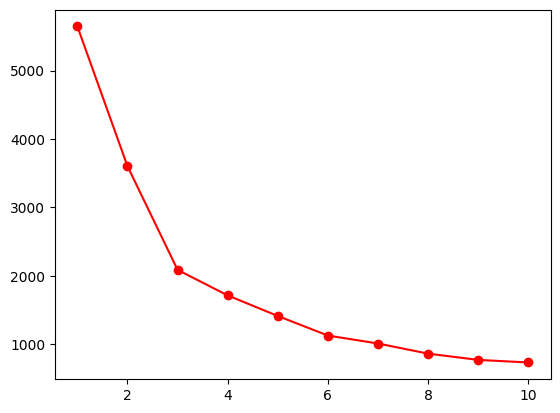

In [8]:
plt.plot(range(1, 11), wcss, 'ro-')
plt.show()

In [9]:
model = KMeans(n_clusters=7, init='k-means++')
clusters = model.fit_predict(scaled_values)
clusters

array([2, 2, 6, ..., 6, 2, 4])

In [10]:
df['cluster'] = clusters

In [11]:
df

,ORDERLINENUMBER,SALES,cluster
0,2,2871.00,2
1,5,2765.90,2
2,2,3884.34,6
3,6,3746.70,4
4,14,5205.27,3
...,...,...,...
2818,15,2244.40,5
2819,1,3978.51,6
2820,4,5417.57,6
2821,1,2116.16,2


In [12]:
model.inertia_

998.9450548736186

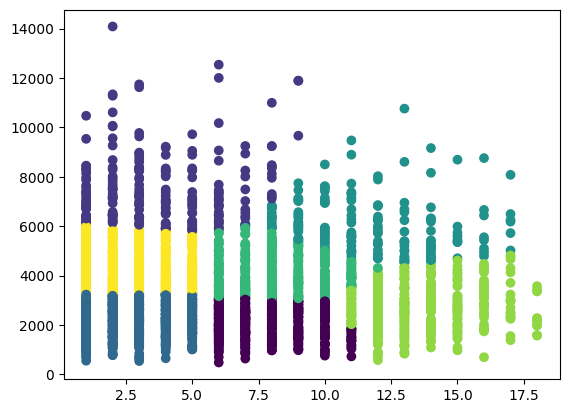

In [13]:
plt.scatter(df['ORDERLINENUMBER'], df['SALES'], c=df['cluster'])
plt.show()

In [14]:
# Standardizing the data for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['ORDERLINENUMBER', 'SALES']])


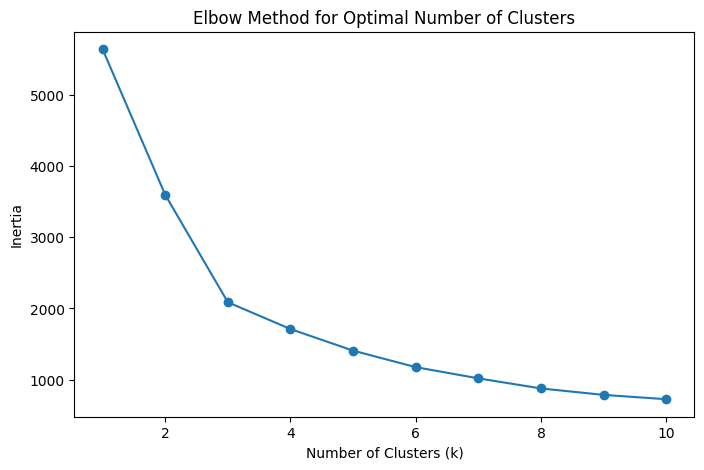

In [21]:
# Using the elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


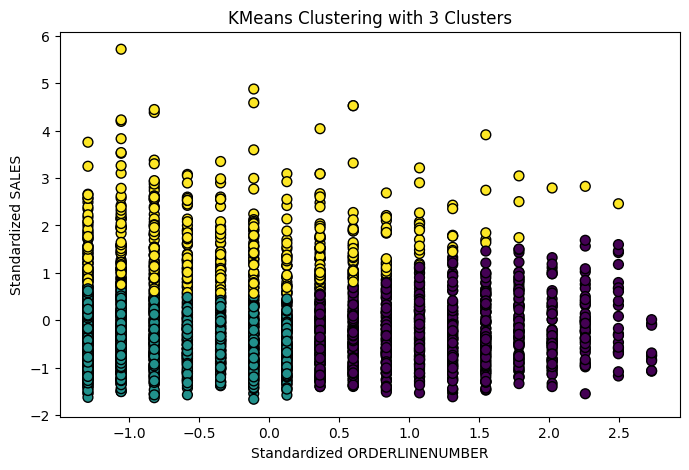

In [23]:

# Implementing KMeans with the optimal number of clusters (chosen based on elbow curve)
optimal_k = 3  # Set based on elbow method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing KMeans clusters
plt.figure(figsize=(8, 5))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['KMeans_Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title(f'KMeans Clustering with {optimal_k} Clusters')
plt.xlabel('Standardized ORDERLINENUMBER')
plt.ylabel('Standardized SALES')
plt.show()
